In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# YSC

In [2]:
#import data
names = ['m', 'x', 'y', 'z', 'vx', 'vy', 'vz']
data_ysc = pd.read_csv("YSC_N10000_endsim.dat", sep=",", header=0, names=names)
data_ysc['simulation'] = [(i//3+1) for i in range(len(data_ysc))]
data_ysc

,m,x,y,z,vx,vy,vz,simulation
0,50.279995,0.113208,0.034386,0.022581,-1.554359,73.003181,95.337515,1
1,42.430295,0.112654,0.034437,0.022792,39.727262,-74.967304,-105.389632,1
2,7.922303,-1.321844,-0.402669,-0.265383,-202.906440,-61.814698,-40.626653,1
3,42.605799,-0.019820,-0.069529,0.122362,241.117960,80.541936,27.483283,2
4,30.012587,-0.019903,-0.069464,0.122363,-349.486512,-139.539435,5.347029,2
...,...,...,...,...,...,...,...,...
29995,3.098252,-5.563291,7.298985,-13.133733,-830.689000,1089.850835,-1961.070821,9999
29996,63.138950,0.160927,-0.211130,0.380030,128.713258,-73.831570,41.613869,9999
29997,39.670667,0.069257,0.330360,0.923332,371.029933,-362.176070,-76.691799,10000
29998,32.617436,0.069270,0.330361,0.923332,-428.369489,549.682340,398.450981,10000


In [3]:
# rescale the data from N-body UNITS to Physical UNITS
def rescale_physical (data):
    G_pym = 4.30091e-3                  # in m^3 * kg^-1 * s^-2
    M_scale =  1.988e30                 # in Kg (solar Mass --> 1.988 * 10^30 Kg)
    L_scale = 3.08567758130573e16       # in m (1 pc --> 3.08567758130573 * 10^16 m)
    T_scale = np.sqrt(L_scale**3 / (G_pym * M_scale))

    data['m'] = data['m'] * M_scale
    data['x'] = data['x'] * L_scale
    data['y'] = data['y'] * L_scale
    data['z'] = data['z'] * L_scale
    data['vx'] = data['vx'] * (L_scale / T_scale)
    data['vy'] = data['vy'] * (L_scale / T_scale)
    data['vz'] = data['vz'] * (L_scale / T_scale)
    
    return(data)

In [4]:
data_ysc

,m,x,y,z,vx,vy,vz,simulation
0,50.279995,0.113208,0.034386,0.022581,-1.554359,73.003181,95.337515,1
1,42.430295,0.112654,0.034437,0.022792,39.727262,-74.967304,-105.389632,1
2,7.922303,-1.321844,-0.402669,-0.265383,-202.906440,-61.814698,-40.626653,1
3,42.605799,-0.019820,-0.069529,0.122362,241.117960,80.541936,27.483283,2
4,30.012587,-0.019903,-0.069464,0.122363,-349.486512,-139.539435,5.347029,2
...,...,...,...,...,...,...,...,...
29995,3.098252,-5.563291,7.298985,-13.133733,-830.689000,1089.850835,-1961.070821,9999
29996,63.138950,0.160927,-0.211130,0.380030,128.713258,-73.831570,41.613869,9999
29997,39.670667,0.069257,0.330360,0.923332,371.029933,-362.176070,-76.691799,10000
29998,32.617436,0.069270,0.330361,0.923332,-428.369489,549.682340,398.450981,10000


In [5]:
%%time
#add a column with the enrgy to the dataframe

#compute, in order 01 12 20
N = len(data_ysc)
m = data_ysc['m'].values
x = data_ysc['x'].values
y = data_ysc['y'].values
z = data_ysc['z'].values
vx = data_ysc['vx'].values
vy = data_ysc['vy'].values
vz = data_ysc['vz'].values

#mprod
m_prod = np.zeros(N)
m_prod[0::3] = m[0::3] * m[1::3]
m_prod[1::3] = m[1::3] * m[2::3]
m_prod[2::3] = m[2::3] * m[0::3]

#reduced mass
mu = np.zeros(N)
mu[0::3] = m_prod[0::3] / (m[0::3] + m[1::3])
mu[1::3] = m_prod[1::3] / (m[1::3] + m[2::3])
mu[2::3] = m_prod[2::3] / (m[2::3] + m[0::3])

#pos_rel
pos_rel = np.zeros(N)
pos_rel[0::3] = np.sqrt((x[0::3] - x[1::3])**2 + (y[0::3] - y[1::3])**2 + (z[0::3] - z[1::3])**2)
pos_rel[1::3] = np.sqrt((x[1::3] - x[2::3])**2 + (y[1::3] - y[2::3])**2 + (z[1::3] - z[2::3])**2)                      
pos_rel[2::3] = np.sqrt((x[2::3] - x[0::3])**2 + (y[2::3] - y[0::3])**2 + (z[2::3] - z[0::3])**2)
                                                                          
#v2_rel                                                                         
v2_rel = np.zeros(N)
v2_rel[0::3] = (vx[0::3] - vx[1::3])**2 + (vy[0::3] - vy[1::3])**2 + (vz[0::3] - vz[1::3])**2                                      
v2_rel[1::3] = (vx[1::3] - vx[2::3])**2 + (vy[1::3] - vy[2::3])**2 + (vz[1::3] - vz[2::3])**2
v2_rel[2::3] = (vx[2::3] - vx[0::3])**2 + (vy[2::3] - vy[0::3])**2 + (vz[2::3] - vz[0::3])**2
         
# gravitaional constant
#G = 4.30091e-3         # in m^3 * kg^-1 * s^-2
G=1

#binding energy
BE_y = np.zeros(N) 
BE_y[0::3] = (0.5 * mu[0::3] * v2_rel[0::3]) - (G * m_prod[0::3] / pos_rel[0::3])
BE_y[1::3] = (0.5 * mu[1::3] * v2_rel[1::3]) - (G * m_prod[1::3] / pos_rel[1::3])
BE_y[2::3] = (0.5 * mu[2::3] * v2_rel[2::3]) - (G * m_prod[2::3] / pos_rel[2::3])

data_ysc['BE'] = BE_y  

data_ysc

CPU times: user 7.2 ms, sys: 2.46 ms, total: 9.66 ms
Wall time: 28.7 ms


,m,x,y,z,vx,vy,vz,simulation,BE
0,50.279995,0.113208,0.034386,0.022581,-1.554359,73.003181,95.337515,1,-2.845552e+06
1,42.430295,0.112654,0.034437,0.022792,39.727262,-74.967304,-105.389632,1,2.108643e+05
2,7.922303,-1.321844,-0.402669,-0.265383,-202.906440,-61.814698,-40.626653,1,2.639319e+05
3,42.605799,-0.019820,-0.069529,0.122362,241.117960,80.541936,27.483283,2,-8.583611e+06
4,30.012587,-0.019903,-0.069464,0.122363,-349.486512,-139.539435,5.347029,2,6.896483e+05
...,...,...,...,...,...,...,...,...,...
29995,3.098252,-5.563291,7.298985,-13.133733,-830.689000,1089.850835,-1961.070821,9999,9.281354e+06
29996,63.138950,0.160927,-0.211130,0.380030,128.713258,-73.831570,41.613869,9999,-1.139045e+07
29997,39.670667,0.069257,0.330360,0.923332,371.029933,-362.176070,-76.691799,10000,-8.190442e+07
29998,32.617436,0.069270,0.330361,0.923332,-428.369489,549.682340,398.450981,10000,1.261396e+07


In [6]:
def identify(energies):
    e1, e2, e3 = energies[0], energies[1], energies[2]
    if e1 < 0 and e2 > 0 and e3 > 0: return "fly_by"
    elif e1 > 0 and e2 > 0 and e3 < 0: return "exchange1"
    elif e1 > 0 and e2 < 0 and e3 > 0: return "exchange0"
    elif e1 > 0 and e2 > 0 and e3 > 0: return "ionization"
    elif e1 == 0 or e2 == 0 or e3 == 0: return "merge"
    else: return "unknown"

events_y = []
for i in range(0, len(BE_y), 3):
    energies = [BE_y[i], BE_y[i+1], BE_y[i+2]]
    events_y.append(identify(energies))
    
dic = { i: events_y[i-1] for i in range(1, len(events_y) +1 )}

df_y = pd.DataFrame(dic.items(), columns=['simulation', 'event'])
display(df_y)
display(df_y.groupby("event").count())

,simulation,event
0,1,fly_by
1,2,fly_by
2,3,fly_by
3,4,fly_by
4,5,fly_by
...,...,...
9995,9996,exchange1
9996,9997,fly_by
9997,9998,fly_by
9998,9999,exchange1


,simulation
event,
exchange0,443
exchange1,1678
fly_by,7617
ionization,63
merge,11
unknown,188


# NSC

In [7]:
names = ['m', 'x', 'y', 'z', 'vx', 'vy', 'vz']
data_nsc = pd.read_csv("NSC_N10000_endsim.dat", sep=",", header=0, names=names)
data_nsc['simulation'] = [(i//3+1) for i in range(len(data_nsc))]
data_nsc

,m,x,y,z,vx,vy,vz,simulation
0,39.689111,1.925802,0.350002,0.968372,1388.557614,3488.776785,508.139712,1
1,26.458487,1.925801,0.350003,0.968372,-1365.137573,-5102.896640,-401.311300,1
2,5.531187,-23.030705,-4.185689,-11.580781,-3433.465959,-624.011507,-1726.487191,1
3,40.231075,0.243291,1.429614,1.285392,54.994388,247.569907,193.816131,2
4,39.334465,0.240934,1.430763,1.285734,17.143140,180.294609,191.428339,2
...,...,...,...,...,...,...,...,...
29995,26.665704,-0.394099,-0.925569,0.727975,-94.481573,57.342166,-27.623747,9999
29996,20.899618,1.151319,2.703387,-2.126038,171.982950,403.838089,-317.588862,9999
29997,35.115653,0.082301,0.469057,0.113693,215.911607,-68.121620,10.964345,10000
29998,28.498771,0.082259,0.469373,0.113706,-238.441375,241.305907,24.625440,10000


In [8]:
%%time
#add a column with the enrgy to the dataframe

#compute, in order 01 12 20
N = len(data_nsc)
m = data_nsc['m'].values
x = data_nsc['x'].values
y = data_nsc['y'].values
z = data_nsc['z'].values
vx = data_nsc['vx'].values
vy = data_nsc['vy'].values
vz = data_nsc['vz'].values

#mprod
m_prod = np.zeros(N)
m_prod[0::3] = m[0::3] * m[1::3]
m_prod[1::3] = m[1::3] * m[2::3]
m_prod[2::3] = m[2::3] * m[0::3]

#reduced mass
mu = np.zeros(N)
mu[0::3] = m_prod[0::3] / (m[0::3] + m[1::3])
mu[1::3] = m_prod[1::3] / (m[1::3] + m[2::3])
mu[2::3] = m_prod[2::3] / (m[2::3] + m[0::3])

#pos_rel
pos_rel = np.zeros(N)
pos_rel[0::3] = np.sqrt((x[0::3] - x[1::3])**2 + (y[0::3] - y[1::3])**2 + (z[0::3] - z[1::3])**2)
pos_rel[1::3] = np.sqrt((x[1::3] - x[2::3])**2 + (y[1::3] - y[2::3])**2 + (z[1::3] - z[2::3])**2)                      
pos_rel[2::3] = np.sqrt((x[2::3] - x[0::3])**2 + (y[2::3] - y[0::3])**2 + (z[2::3] - z[0::3])**2)
                                                                          
#v2_rel                                                                         
v2_rel = np.zeros(N)
v2_rel[0::3] = (vx[0::3] - vx[1::3])**2 + (vy[0::3] - vy[1::3])**2 + (vz[0::3] - vz[1::3])**2                                      
v2_rel[1::3] = (vx[1::3] - vx[2::3])**2 + (vy[1::3] - vy[2::3])**2 + (vz[1::3] - vz[2::3])**2
v2_rel[2::3] = (vx[2::3] - vx[0::3])**2 + (vy[2::3] - vy[0::3])**2 + (vz[2::3] - vz[0::3])**2
         
# gravitaional constant
#G = 4.30091e-3         # in m^3 * kg^-1 * s^-2
G=1

#binding energy
BE_n = np.zeros(N) 
BE_n[0::3] = (0.5 * mu[0::3] * v2_rel[0::3]) - (G * m_prod[0::3] / pos_rel[0::3])
BE_n[1::3] = (0.5 * mu[1::3] * v2_rel[1::3]) - (G * m_prod[1::3] / pos_rel[1::3])
BE_n[2::3] = (0.5 * mu[2::3] * v2_rel[2::3]) - (G * m_prod[2::3] / pos_rel[2::3])

data_nsc['BE'] = BE_n  

data_nsc

CPU times: user 6.15 ms, sys: 607 µs, total: 6.76 ms
Wall time: 11.7 ms


,m,x,y,z,vx,vy,vz,simulation,BE
0,39.689111,1.925802,0.350002,0.968372,1388.557614,3488.776785,508.139712,1,-2.619919e+08
1,26.458487,1.925801,0.350003,0.968372,-1365.137573,-5102.896640,-401.311300,1,5.968872e+07
2,5.531187,-23.030705,-4.185689,-11.580781,-3433.465959,-624.011507,-1726.487191,1,1.096188e+08
3,40.231075,0.243291,1.429614,1.285392,54.994388,247.569907,193.816131,2,-5.391805e+05
4,39.334465,0.240934,1.430763,1.285734,17.143140,180.294609,191.428339,2,1.851208e+07
...,...,...,...,...,...,...,...,...,...
29995,26.665704,-0.394099,-0.925569,0.727975,-94.481573,57.342166,-27.623747,9999,1.611751e+06
29996,20.899618,1.151319,2.703387,-2.126038,171.982950,403.838089,-317.588862,9999,5.236748e+06
29997,35.115653,0.082301,0.469057,0.113693,215.911607,-68.121620,10.964345,10000,-7.644114e+05
29998,28.498771,0.082259,0.469373,0.113706,-238.441375,241.305907,24.625440,10000,3.244239e+06


In [9]:
events_n = []
for i in range(0, len(BE_n), 3):
    energies = [BE_n[i], BE_n[i+1], BE_n[i+2]]
    events_n.append(identify(energies))
    
dic_n = { i: events_n[i-1] for i in range(1, len(events_n) +1 )}

df_n = pd.DataFrame(dic_n.items(), columns=['simulation', 'event'])
display(df_n)
display(df_n.groupby("event").count())

,simulation,event
0,1,fly_by
1,2,fly_by
2,3,fly_by
3,4,fly_by
4,5,fly_by
...,...,...
9995,9996,fly_by
9996,9997,fly_by
9997,9998,fly_by
9998,9999,fly_by


,simulation
event,
exchange0,313
exchange1,727
fly_by,7928
ionization,1009
merge,22
unknown,1


## Exchanges

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Fira Sans'


##########exchange 0
ex0_sim_y = df_y[df_y["event"] == "exchange0"]["simulation"].to_numpy()
ex0_y = data_ysc[data_ysc["simulation"].isin(ex0_sim_y)]
BHs0_ex0_y = ex0_y[0::3]["m"].to_numpy()
BHs1_ex0_y = ex0_y[1::3]["m"].to_numpy()
BHs2_ex0_y = ex0_y[2::3]["m"].to_numpy()


ex0_sim_n = df_n[df_n["event"] == "exchange0"]["simulation"].to_numpy()
ex0_n = data_ysc[data_ysc["simulation"].isin(ex0_sim_n)]
BHs0_ex0_n = ex0_n[0::3]["m"].to_numpy()
BHs1_ex0_n = ex0_n[1::3]["m"].to_numpy()
BHs2_ex0_n = ex0_n[2::3]["m"].to_numpy()


##########exchange 1
ex1_sim_y = df_y[df_y["event"] == "exchange1"]["simulation"].to_numpy()
ex1_y = data_ysc[data_ysc["simulation"].isin(ex1_sim_y)]
BHs0_ex1_y = ex1_y[0::3]["m"].to_numpy()
BHs1_ex1_y = ex1_y[1::3]["m"].to_numpy()
BHs2_ex1_y = ex1_y[2::3]["m"].to_numpy()


ex1_sim_n = df_n[df_n["event"] == "exchange1"]["simulation"].to_numpy()
ex1_n = data_ysc[data_ysc["simulation"].isin(ex1_sim_n)]
BHs0_ex1_n = ex1_n[0::3]["m"].to_numpy()
BHs1_ex1_n = ex1_n[1::3]["m"].to_numpy()
BHs2_ex1_n = ex1_n[2::3]["m"].to_numpy()

size = 16
binwidth = 5
bins = range(0, 300 + binwidth, binwidth)

fig, ((ax0, ax1), (ax3, ax4)) = plt.subplots( figsize=(18.0, 16.0) , nrows=2, ncols=2)
#ax0.hist(BHs0_ex0_y, bins = bins, histtype = "step", ec = "k",
 #        linewidth = 1, color = "red", fill = True, alpha =0.5, label = "First Black Hole")

ax0.hist(BHs0_ex1_y + BHs2_ex1_y, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = "True", alpha = 0.4, label = "Sum (Exchange1)")
ax0.hist(BHs1_ex0_y + BHs2_ex0_y, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = True, alpha = 0.4, label = "Sum (Exchange0)")
ax0.set_yscale("log")
ax0.set_title("Young star cluster", size = size + 5)
ax0.set_xlabel("mass (N. B. units)", size = size)
ax0.set_ylabel("counts", size = size)
ax0.grid(which = "both", alpha = 0.3, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size,)
ax0.tick_params(axis = "y", labelsize = size)
ax0.legend(fontsize = size)
#ax0.set_facecolor('gainsboro')


#ax1.hist(BHs0_ex0_n, bins = bins, histtype = "step", ec = "k",
  #       linewidth = 1, color = "red", fill = True, alpha =0.5, label = "First Black Hole")
#ax1.hist(BHs1_ex0_n, bins = bins, histtype = "step", ec = "k",
         #linewidth = 1, color = "dodgerblue", fill = True, alpha = 0.5, label = "Second Black Hole")

ax1.hist(BHs0_ex1_n + BHs2_ex1_n, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = True, alpha = 0.4, label = "Sum (Exchange1)")
ax1.hist(BHs2_ex0_n + BHs1_ex0_n, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.4, label = "Sum (Exchange0)")
ax1.set_yscale("log")
ax1.set_title("Nuclear star cluster", size = size + 5)
ax1.set_xlabel("mass (N. B. units)", size = size)
ax1.set_ylabel("counts", size = size)
ax1.grid(which = "both", alpha = 0.3, linestyle = "--")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.legend(fontsize = size)
#ax1.set_facecolor('gainsboro')


ax3.hist(BHs1_ex1_y, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = True, alpha = 0.4, label = "Third mass (Exchange1)")
ax3.hist(BHs0_ex0_y, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = True, alpha = 0.4, label = "Third mass (Exchange0)")
ax3.set_yscale("log")
#ax3.set_title("Young star cluster", size = size + 5)
ax3.set_xlabel("mass (N. B. units)", size = size)
ax3.set_ylabel("counts", size = size)
ax3.grid(which = "both", alpha = 0.3, linestyle = "--")
ax3.tick_params(axis = "x", labelsize = size)
ax3.tick_params(axis = "y", labelsize = size)
ax3.legend(fontsize = size)


ax4.hist(BHs1_ex1_n, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = True, alpha = 0.4, label = " Third mass (Exchange1)")
ax4.hist(BHs0_ex0_n, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = True, alpha = 0.4, label = "Third mass (Exchange0)")
ax4.set_yscale("log")
#ax3.set_title("Young star cluster", size = size + 5)
ax4.set_xlabel("mass (N. B. units)", size = size)
ax4.set_ylabel("counts", size = size)
ax4.grid(which = "both", alpha = 0.3, linestyle = "--")
ax4.tick_params(axis = "x", labelsize = size)
ax4.tick_params(axis = "y", labelsize = size)
ax4.legend(fontsize = size)

plt.show()

# fly-by

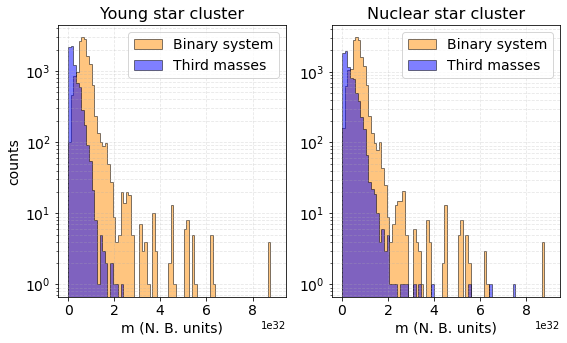

In [38]:
M_scale =  1.988e30 
##########exchange 0
fl_sim_y = df_y[df_y["event"] == "fly_by"]["simulation"].to_numpy()
fl_y = data_ysc[data_ysc["simulation"].isin(fl_sim_y)]
BHs0_fl_y = fl_y[0::3]["m"].to_numpy()*M_scale
BHs1_fl_y = fl_y[1::3]["m"].to_numpy()*M_scale
BHs2_fl_y = fl_y[2::3]["m"].to_numpy()*M_scale


fl_sim_n = df_n[df_n["event"] == "fly_by"]["simulation"].to_numpy()
fl_n = data_ysc[data_ysc["simulation"].isin(fl_sim_n)]
BHs0_fl_n = fl_n[0::3]["m"].to_numpy()*M_scale
BHs1_fl_n = fl_n[1::3]["m"].to_numpy()*M_scale
BHs2_fl_n = fl_n[2::3]["m"].to_numpy()*M_scale



size = 14
nbins = 80
bins = np.linspace(0, int(9e32), nbins)

fig, (ax0, ax1) = plt.subplots( figsize=(9.0, 5.0) , nrows=1, ncols=2)
#ax0.hist(BHs0_ex0_y, bins = bins, histtype = "step", ec = "k",
 #        linewidth = 1, color = "red", fill = True, alpha =0.5, label = "First Black Hole")
ax0.hist(np.concatenate((BHs0_fl_y, BHs1_fl_y)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = True, alpha = 0.5, label = "Binary system")
ax0.hist(BHs2_fl_y, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
ax0.set_yscale("log")
ax0.set_title("Young star cluster", size = size + 2)
ax0.set_xlabel("m (N. B. units)", size = size)
ax0.set_ylabel("counts", size = size)
ax0.grid(which = "both", alpha = 0.3, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.legend(fontsize = size)
#ax0.set_facecolor('gainsboro')


#ax1.hist(BHs0_ex0_n, bins = bins, histtype = "step", ec = "k",
  #       linewidth = 1, color = "red", fill = True, alpha =0.5, label = "First Black Hole")
#ax1.hist(BHs1_ex0_n, bins = bins, histtype = "step", ec = "k",
         #linewidth = 1, color = "dodgerblue", fill = True, alpha = 0.5, label = "Second Black Hole")
ax1.hist(np.concatenate((BHs0_fl_n, BHs1_fl_n)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = "True", alpha = 0.5, label = "Binary system")
ax1.hist(BHs2_fl_n, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
#ax1.hist(BHs0_ex1_n + BHs2_ex1_n, bins = bins, histtype = "step", ec = "k",
 #        linewidth = 1, color = "darkorange", fill = True, alpha = 0.5, label = "Exchange1")
ax1.set_yscale("log")
ax1.set_title("Nuclear star cluster", size = size + 2)
ax1.set_xlabel("m (N. B. units)", size = size)
#ax1.set_ylabel("counts", size = size)
ax1.grid(which = "both", alpha = 0.3, linestyle = "--")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.legend(fontsize = size)
#ax1.set_facecolor('gainsboro')


plt.show()
fig.savefig("masses_fl.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)

(array([1.2655e+04, 2.9890e+03, 1.1500e+02, 4.2000e+01, 1.2000e+01,
        2.8000e+01, 7.0000e+00, 4.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([  0.        ,  43.77933551,  87.55867102, 131.33800653,
        175.11734204, 218.89667755, 262.67601306, 306.45534857,
        350.23468408, 394.01401959, 437.7933551 ]),
 <a list of 10 Patch objects>)

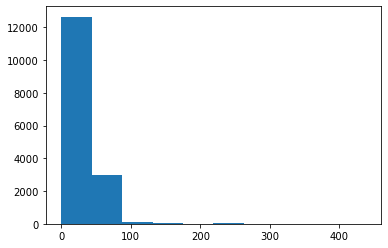

In [15]:
plt.hist(np.concatenate((BHs0_fl_n, BHs1_fl_n)))

##########exchange 0
ex0_sim_y = df_y[df_y["event"] == "exchange0"]["simulation"].to_numpy()
ex0_y = data_ysc[data_ysc["simulation"].isin(ex0_sim_y)]
BHs0_ex0_y = ex0_y[0::3]["m"].to_numpy()
BHs1_ex0_y = ex0_y[1::3]["m"].to_numpy()
BHs2_ex0_y = ex0_y[2::3]["m"].to_numpy()


ex0_sim_n = df_n[df_n["event"] == "exchange0"]["simulation"].to_numpy()
ex0_n = data_ysc[data_ysc["simulation"].isin(ex0_sim_n)]
BHs0_ex0_n = ex0_n[0::3]["m"].to_numpy()
BHs1_ex0_n = ex0_n[1::3]["m"].to_numpy()
BHs2_ex0_n = ex0_n[2::3]["m"].to_numpy()


##########exchange 1
ex1_sim_y = df_y[df_y["event"] == "exchange1"]["simulation"].to_numpy()
ex1_y = data_ysc[data_ysc["simulation"].isin(ex1_sim_y)]
BHs0_ex1_y = ex1_y[0::3]["m"].to_numpy()
BHs1_ex1_y = ex1_y[1::3]["m"].to_numpy()
BHs2_ex1_y = ex1_y[2::3]["m"].to_numpy()


ex1_sim_n = df_n[df_n["event"] == "exchange1"]["simulation"].to_numpy()
ex1_n = data_ysc[data_ysc["simulation"].isin(ex1_sim_n)]
BHs0_ex1_n = ex1_n[0::3]["m"].to_numpy()
BHs1_ex1_n = ex1_n[1::3]["m"].to_numpy()
BHs2_ex1_n = ex1_n[2::3]["m"].to_numpy()

size = 14
binwidth = 5
bins = range(0, 300 + binwidth, binwidth)

fig, (ax0, ax1) = plt.subplots( figsize=(10.0, 5.0) , nrows=1, ncols=2)
#ax0.hist(BHs0_ex0_y, bins = bins, histtype = "step", ec = "k",
 #        linewidth = 1, color = "red", fill = True, alpha =0.5, label = "First Black Hole")
ax0.hist(np.concatenate((BHs1_ex0_y, BHs2_ex0_y, BHs0_ex1_y, BHs2_ex1_y)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = True, alpha = 0.5, label = "Binary system")
ax0.hist(np.concatenate((BHs0_ex0_y, BHs1_ex1_y)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
ax0.set_yscale("log")
ax0.set_title("Young star cluster", size = size + 2)
ax0.set_xlabel("m (N. B. units)", size = size)
ax0.set_ylabel("counts", size = size)
ax0.grid(which = "both", alpha = 0.3, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.legend(fontsize = size)
#ax0.set_facecolor('gainsboro')


#ax1.hist(BHs0_ex0_n, bins = bins, histtype = "step", ec = "k",
  #       linewidth = 1, color = "red", fill = True, alpha =0.5, label = "First Black Hole")
#ax1.hist(BHs1_ex0_n, bins = bins, histtype = "step", ec = "k",
         #linewidth = 1, color = "dodgerblue", fill = True, alpha = 0.5, label = "Second Black Hole")
ax1.hist(np.concatenate((BHs1_ex0_n, BHs2_ex0_n, BHs0_ex1_n, BHs2_ex1_n)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = "True", alpha = 0.5, label = "Binary system")
ax1.hist(np.concatenate((BHs0_ex0_n, BHs1_ex1_n)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
#ax1.hist(BHs0_ex1_n + BHs2_ex1_n, bins = bins, histtype = "step", ec = "k",
 #        linewidth = 1, color = "darkorange", fill = True, alpha = 0.5, label = "Exchange1")
ax1.set_yscale("log")
ax1.set_title("Nuclear star cluster", size = size + 2)
ax1.set_xlabel("m (N. B. units)", size = size)
ax1.set_ylabel("counts", size = size)
ax1.grid(which = "both", alpha = 0.3, linestyle = "--")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.legend(fontsize = size)
#ax1.set_facecolor('gainsboro')


plt.show()
#fig.savefig("masses_ex.pdf", transparent = True, bbox_inches = 'tight',
#    pad_inches = 0)

# exchanges

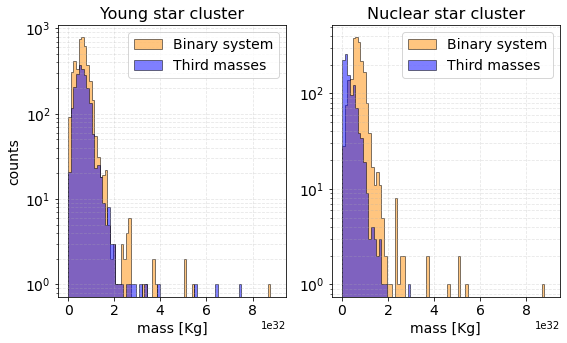

In [12]:
M_scale =  1.988e30 

##########exchange 0
ex0_sim_y = df_y[df_y["event"] == "exchange0"]["simulation"].to_numpy()
ex0_y = data_ysc[data_ysc["simulation"].isin(ex0_sim_y)]
BHs0_ex0_y = ex0_y[0::3]["m"].to_numpy()
BHs0_ex0_y = BHs0_ex0_y*M_scale

BHs1_ex0_y = ex0_y[1::3]["m"].to_numpy()
BHs1_ex0_y = BHs1_ex0_y*M_scale

BHs2_ex0_y = ex0_y[2::3]["m"].to_numpy()
BHs2_ex0_y = BHs2_ex0_y*M_scale


ex0_sim_n = df_n[df_n["event"] == "exchange0"]["simulation"].to_numpy()
ex0_n = data_ysc[data_ysc["simulation"].isin(ex0_sim_n)]
BHs0_ex0_n = ex0_n[0::3]["m"].to_numpy()
BHs0_ex0_n = BHs0_ex0_n*M_scale

BHs1_ex0_n = ex0_n[1::3]["m"].to_numpy()
BHs1_ex0_n = BHs1_ex0_n*M_scale


BHs2_ex0_n = ex0_n[2::3]["m"].to_numpy()
BHs2_ex0_n = BHs2_ex0_n*M_scale


##########exchange 1
ex1_sim_y = df_y[df_y["event"] == "exchange1"]["simulation"].to_numpy()
ex1_y = data_ysc[data_ysc["simulation"].isin(ex1_sim_y)]
BHs0_ex1_y = ex1_y[0::3]["m"].to_numpy()
BHs0_ex1_y = BHs0_ex1_y*M_scale

BHs1_ex1_y = ex1_y[1::3]["m"].to_numpy()
BHs1_ex1_y = BHs1_ex1_y*M_scale

BHs2_ex1_y = ex1_y[2::3]["m"].to_numpy()
BHs2_ex1_y = BHs2_ex1_y*M_scale


ex1_sim_n = df_n[df_n["event"] == "exchange1"]["simulation"].to_numpy()
ex1_n = data_ysc[data_ysc["simulation"].isin(ex1_sim_n)]
BHs0_ex1_n = ex1_n[0::3]["m"].to_numpy()
BHs0_ex1_n = BHs0_ex1_n*M_scale

BHs1_ex1_n = ex1_n[1::3]["m"].to_numpy()
BHs1_ex1_n = BHs1_ex1_n*M_scale

BHs2_ex1_n = ex1_n[2::3]["m"].to_numpy()
BHs2_ex1_n = BHs2_ex1_n*M_scale


size = 14
nbins = 80
bins = np.linspace(0, int(9e32), nbins)

fig, (ax0, ax1) = plt.subplots( figsize=(9.0, 5.0) , nrows=1, ncols=2)
#ax0.hist(BHs0_ex0_y, bins = bins, histtype = "step", ec = "k",
 #        linewidth = 1, color = "red", fill = True, alpha =0.5, label = "First Black Hole")
ax0.hist(np.concatenate((BHs0_ex0_y, BHs1_ex0_y, BHs0_ex1_y, BHs1_ex1_y)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = True, alpha = 0.5, label = "Binary system")
ax0.hist(np.concatenate((BHs2_ex0_y, BHs2_ex1_y)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
ax0.set_yscale("log")
ax0.set_title("Young star cluster", size = size + 2)
ax0.set_xlabel("mass [Kg]", size = size)
ax0.set_ylabel("counts", size = size)
ax0.grid(which = "both", alpha = 0.3, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.legend(fontsize = size)
#ax0.set_facecolor('gainsboro')


#ax1.hist(BHs0_ex0_n, bins = bins, histtype = "step", ec = "k",
  #       linewidth = 1, color = "red", fill = True, alpha =0.5, label = "First Black Hole")
#ax1.hist(BHs1_ex0_n, bins = bins, histtype = "step", ec = "k",
         #linewidth = 1, color = "dodgerblue", fill = True, alpha = 0.5, label = "Second Black Hole")
ax1.hist(np.concatenate((BHs0_ex0_n, BHs1_ex0_n, BHs0_ex1_n, BHs1_ex1_n)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = "True", alpha = 0.5, label = "Binary system")
ax1.hist(np.concatenate((BHs2_ex0_n, BHs2_ex1_n)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
#ax1.hist(BHs0_ex1_n + BHs2_ex1_n, bins = bins, histtype = "step", ec = "k",
 #        linewidth = 1, color = "darkorange", fill = True, alpha = 0.5, label = "Exchange1")
ax1.set_yscale("log")
ax1.set_title("Nuclear star cluster", size = size + 2)
ax1.set_xlabel("mass [Kg]", size = size)
#ax1.set_ylabel("counts", size = size)
ax1.grid(which = "both", alpha = 0.3, linestyle = "--")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.legend(fontsize = size)
#ax1.set_facecolor('gainsboro')


plt.show()
fig.savefig("masses_ex.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)

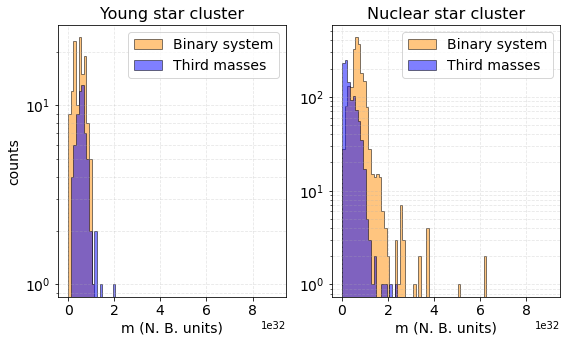

In [37]:
M_scale =  1.988e30 
##########exchange 0
i_sim_y = df_y[df_y["event"] == "ionization"]["simulation"].to_numpy()
i_y = data_ysc[data_ysc["simulation"].isin(i_sim_y)]
BHs0_i_y = i_y[0::3]["m"].to_numpy()*M_scale
BHs1_i_y = i_y[1::3]["m"].to_numpy()*M_scale
BHs2_i_y = i_y[2::3]["m"].to_numpy()*M_scale


i_sim_n = df_n[df_n["event"] == "ionization"]["simulation"].to_numpy()
i_n = data_ysc[data_ysc["simulation"].isin(i_sim_n)]
BHs0_i_n = i_n[0::3]["m"].to_numpy()*M_scale
BHs1_i_n = i_n[1::3]["m"].to_numpy()*M_scale
BHs2_i_n = i_n[2::3]["m"].to_numpy()*M_scale



size = 14
nbins = 80
bins = np.linspace(0, int(9e32), nbins)

fig, (ax0, ax1) = plt.subplots( figsize=(9.0, 5.0) , nrows=1, ncols=2)
#ax0.hist(BHs0_ex0_y, bins = bins, histtype = "step", ec = "k",
 #        linewidth = 1, color = "red", fill = True, alpha =0.5, label = "First Black Hole")
ax0.hist(np.concatenate((BHs0_i_y, BHs1_i_y)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = True, alpha = 0.5, label = "Binary system")
ax0.hist(BHs2_i_y, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
ax0.set_yscale("log")
ax0.set_title("Young star cluster", size = size + 2)
ax0.set_xlabel("m (N. B. units)", size = size)
ax0.set_ylabel("counts", size = size)
ax0.grid(which = "both", alpha = 0.3, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.legend(fontsize = size)
#ax0.set_facecolor('gainsboro')


#ax1.hist(BHs0_ex0_n, bins = bins, histtype = "step", ec = "k",
  #       linewidth = 1, color = "red", fill = True, alpha =0.5, label = "First Black Hole")
#ax1.hist(BHs1_ex0_n, bins = bins, histtype = "step", ec = "k",
         #linewidth = 1, color = "dodgerblue", fill = True, alpha = 0.5, label = "Second Black Hole")
ax1.hist(np.concatenate((BHs0_i_n, BHs1_i_n)), bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "darkorange", fill = "True", alpha = 0.5, label = "Binary system")
ax1.hist(BHs2_i_n, bins = bins, histtype = "step", ec = "k",
         linewidth = 1, color = "blue", fill = "True", alpha = 0.5, label = "Third masses")
#ax1.hist(BHs0_ex1_n + BHs2_ex1_n, bins = bins, histtype = "step", ec = "k",
 #        linewidth = 1, color = "darkorange", fill = True, alpha = 0.5, label = "Exchange1")
ax1.set_yscale("log")
ax1.set_title("Nuclear star cluster", size = size + 2)
ax1.set_xlabel("m (N. B. units)", size = size)
#ax1.set_ylabel("counts", size = size)
ax1.grid(which = "both", alpha = 0.3, linestyle = "--")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.legend(fontsize = size)
#ax1.set_facecolor('gainsboro')


plt.show()
fig.savefig("masses_i.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)

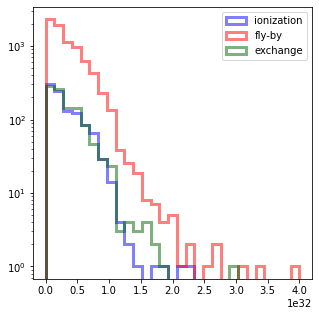

In [36]:
size = 14
nbins = 30
bins = np.linspace(0, int(4e32), nbins)
fig = plt.figure(figsize = (5,5))
plt.hist(BHs2_i_n, alpha = 0.5, bins = bins, label = "ionization", histtype = "step", linewidth = 3, color = "blue")
plt.hist(BHs2_fl_n, alpha = 0.5, bins = bins, label = "fly-by", histtype = "step", linewidth = 3, color = "red")
plt.hist(np.concatenate((BHs2_ex0_n, BHs2_ex1_n)), alpha = 0.5, bins = bins, label = "exchange", histtype = "step",
         linewidth = 3, color = "darkgreen")
plt.yscale("log")
plt.legend()
plt.show()

# Semi-Major axis

In [47]:
################################# YSC
data_sma_y_h = pd.read_csv("YSC_semi_major_axis_head.dat", sep=",", header=0)
data_sma_y_h['simulation'] = [(i+1) for i in range(len(data_sma_y_h))]
data_sma_y_t = pd.read_csv("YSC_semi_major_axis_tail.dat", sep=",", header=0)
data_sma_y_t['simulation'] = [(i+1) for i in range(len(data_sma_y_t))]
#display(data_sma_y)

################################# NSC
data_sma_n_h = pd.read_csv("NSC_semi_major_axis_head.dat", sep=",", header=0)
data_sma_n_h['simulation'] = [(i+1) for i in range(len(data_sma_n_h))]
data_sma_n_t = pd.read_csv("NSC_semi_major_axis_tail.dat", sep=",", header=0)
data_sma_n_t['simulation'] = [(i+1) for i in range(len(data_sma_n_t))]
#display(data_sma_n)

In [48]:
L_scale = 3.08567758130573e16 
sma_ex0_y_h = data_sma_y_h[data_sma_y_h["simulation"].isin(ex0_sim_y)]
sma_ex0_y_t = data_sma_y_t[data_sma_y_t["simulation"].isin(ex0_sim_y)]

sma_ex0_n_h = data_sma_n_h[data_sma_y_h["simulation"].isin(ex0_sim_n)]
sma_ex0_n_t = data_sma_n_t[data_sma_y_t["simulation"].isin(ex0_sim_n)]

sma_ex0_y_h = sma_ex0_y_h["A"].to_numpy()
sma_ex0_y_h = sma_ex0_y_h[sma_ex0_y_h != 9999]
sma_ex0_y_h = sma_ex0_y_h*L_scale

sma_ex0_y_t = sma_ex0_y_t["A"].to_numpy()
sma_ex0_y_t = sma_ex0_y_t[sma_ex0_y_t != 9999]
sma_ex0_y_t = sma_ex0_y_t*L_scale

sma_ex0_n_h = sma_ex0_n_h["A"].to_numpy()
sma_ex0_n_h = sma_ex0_n_h[sma_ex0_n_h != 9999]
sma_ex0_n_h = sma_ex0_n_h*L_scale

sma_ex0_n_t = sma_ex0_n_t["A"].to_numpy()
sma_ex0_n_t = sma_ex0_n_t[sma_ex0_n_t != 9999]
sma_ex0_n_t = sma_ex0_n_t*L_scale

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle("Exchange 0", size = 25, weight = "bold")
size = 14
binwidth = 0.008
bins = np.arange(0, 0.15, binwidth)

ax0.hist(sma_ex0_y_h, bins = bins, color = "red", histtype = "step",
        density = True, label = "Start")
ax0.hist(sma_ex0_y_t, bins = bins, color = "blue", histtype = "step",
         density = True, label = "End")
ax0.set_yscale("log")
#ax0.set_xscale("log")
ax0.grid(which = "both", axis = "y", alpha = 0.5, linewidth = 1, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.set_title("Young star cluster", size = size + 5)
ax0.set_xlabel("A (N.B. units)", size = size)
ax0.set_ylabel("counts", size = size)
ax0.legend(fontsize = size)

ax1.hist(sma_ex0_n_h, bins = bins, color = "red", histtype = "step",
        density = True, label = "Start")
ax1.hist(sma_ex0_n_t, bins = bins, color = "blue", histtype = "step",
         density = True, label = "End")
ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.grid(which = "both", axis = "y", alpha = 0.5, linewidth = 1, linestyle = "--")
ax1.set_title("Nuclear star cluster", size = size + 5)
ax1.set_xlabel("A (N.B. units)", size = size)
ax1.set_ylabel("counts", size = size)
ax1.legend(fontsize = size)
plt.show()

In [49]:
L_scale = 3.08567758130573e16 

sma_ex1_y_h = data_sma_y_h[data_sma_y_h["simulation"].isin(ex1_sim_y)]
sma_ex1_y_t = data_sma_y_t[data_sma_y_t["simulation"].isin(ex1_sim_y)]

sma_ex1_n_h = data_sma_n_h[data_sma_y_h["simulation"].isin(ex1_sim_n)]
sma_ex1_n_t = data_sma_n_t[data_sma_y_t["simulation"].isin(ex1_sim_n)]

sma_ex1_y_h = sma_ex1_y_h["A"].to_numpy()
sma_ex1_y_h = sma_ex1_y_h[sma_ex1_y_h != 9999]
sma_ex1_y_h = sma_ex1_y_h*L_scale

sma_ex1_y_t = sma_ex1_y_t["A"].to_numpy()
sma_ex1_y_t = sma_ex1_y_t[sma_ex1_y_t != 9999]
sma_ex1_y_t = sma_ex1_y_t*L_scale


sma_ex1_n_h = sma_ex1_n_h["A"].to_numpy()
sma_ex1_n_h = sma_ex1_n_h[sma_ex1_n_h != 9999]
sma_ex1_n_h = sma_ex1_n_h*L_scale

sma_ex1_n_t = sma_ex1_n_t["A"].to_numpy()
sma_ex1_n_t = sma_ex1_n_t[sma_ex1_n_t != 9999]
sma_ex1_n_t = sma_ex1_n_t*L_scale

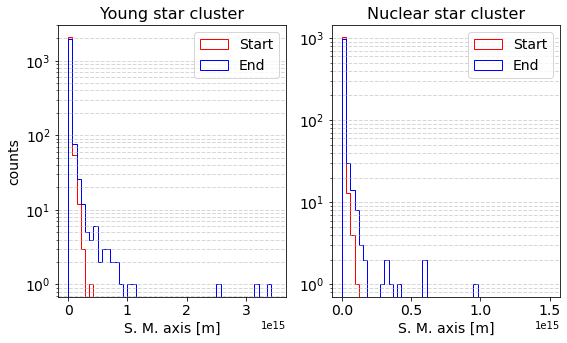

In [50]:


fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
#fig.suptitle("Exchanges", size = 25, weight = "bold")
size = 14
nbins = 50
bins1 = np.linspace(0, int(3.5e15), nbins)
bins2 = np.linspace(0, int(1.5e15), nbins)

ax0.hist(np.concatenate((sma_ex0_y_h, sma_ex1_y_h)), bins = bins1, color = "red", histtype = "step", label = "Start")
ax0.hist(np.concatenate((sma_ex0_y_t, sma_ex1_y_t)), bins = bins1, color = "blue", histtype = "step", label = "End")
ax0.set_yscale("log")
ax0.grid(which = "both", axis = "y", alpha = 0.5, linewidth = 1, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.set_title("Young star cluster", size = size + 2)
ax0.set_xlabel("S. M. axis [m]", size = size)
ax0.set_ylabel("counts", size = size)
ax0.legend(fontsize = size)

ax1.hist(np.concatenate((sma_ex0_n_h, sma_ex1_n_h)), bins = bins2, color = "red", histtype = "step", label = "Start")
ax1.hist(np.concatenate((sma_ex0_n_t, sma_ex1_n_t)), bins = bins2, color = "blue", histtype = "step", label = "End")
ax1.set_yscale("log")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.grid(which = "both", axis = "y", alpha = 0.5, linewidth = 1, linestyle = "--")
ax1.set_title("Nuclear star cluster", size = size + 2)
ax1.set_xlabel("S. M. axis [m]", size = size)
#ax1.set_ylabel("counts", size = size)
ax1.legend(fontsize = size)
plt.show()

fig.savefig("sma_ex.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)

## Kolmogorov test

In [57]:
from scipy import stats

In [ ]:
print(stats.ks_2samp(np.concatenate((sma_ex0_y_h, sma_ex1_y_h)), np.concatenate((sma_ex0_y_t, sma_ex1_y_t))))

In [ ]:
print(stats.ks_2samp(np.concatenate((sma_ex0_n_h, sma_ex1_n_h)), np.concatenate((sma_ex0_n_t, sma_ex1_n_t))))

In [ ]:
print(stats.ks_2samp(np.concatenate((sma_ex0_y_t, sma_ex1_y_t)), np.concatenate((sma_ex0_n_t, sma_ex1_n_t))))

In [52]:
sma_fl_y_h = data_sma_y_h[data_sma_y_h["simulation"].isin(fl_sim_y)]
sma_fl_y_t = data_sma_y_t[data_sma_y_t["simulation"].isin(fl_sim_y)]

sma_fl_n_h = data_sma_n_h[data_sma_y_h["simulation"].isin(fl_sim_n)]
sma_fl_n_t = data_sma_n_t[data_sma_y_t["simulation"].isin(fl_sim_n)]



In [53]:
sma_fl_y_h = sma_fl_y_h["A"].to_numpy()
sma_fl_y_h = sma_fl_y_h[sma_fl_y_h != 9999]
sma_fl_y_h = sma_fl_y_h*L_scale

sma_fl_y_t = sma_fl_y_t["A"].to_numpy()
sma_fl_y_t = sma_fl_y_t[sma_fl_y_t != 9999]
sma_fl_y_t = sma_fl_y_t*L_scale

sma_fl_n_h = sma_fl_n_h["A"].to_numpy()
sma_fl_n_h = sma_fl_n_h[sma_fl_n_h != 9999]
sma_fl_n_h = sma_fl_n_h*L_scale

sma_fl_n_t = sma_fl_n_t["A"].to_numpy()
sma_fl_n_t = sma_fl_n_t[sma_fl_n_t != 9999]
sma_fl_n_t = sma_fl_n_t*L_scale

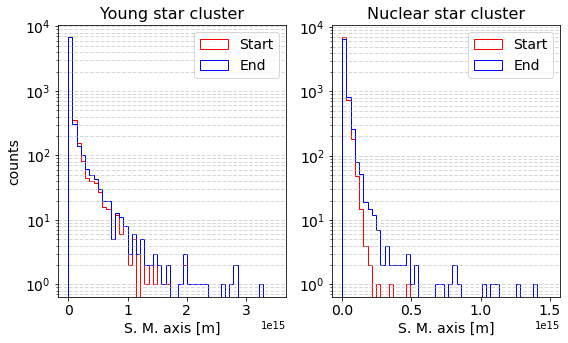

In [55]:


fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
#fig.suptitle("Exchanges", size = 25, weight = "bold")
size = 14
nbins = 50
bins1 = np.linspace(0, int(3.5e15), nbins)
bins2 = np.linspace(0, int(1.5e15), nbins)

ax0.hist(sma_fl_y_h, bins = bins1, color = "red", histtype = "step", label = "Start")
ax0.hist(sma_fl_y_t, bins = bins1, color = "blue", histtype = "step", label = "End")
ax0.set_yscale("log")
ax0.grid(which = "both", axis = "y", alpha = 0.5, linewidth = 1, linestyle = "--")
ax0.tick_params(axis = "x", labelsize = size)
ax0.tick_params(axis = "y", labelsize = size)
ax0.set_title("Young star cluster", size = size + 2)
ax0.set_xlabel("S. M. axis [m]", size = size)
ax0.set_ylabel("counts", size = size)
ax0.legend(fontsize = size)

ax1.hist(sma_fl_n_h, bins = bins2, color = "red", histtype = "step", label = "Start")
ax1.hist(sma_fl_n_t, bins = bins2, color = "blue", histtype = "step", label = "End")
ax1.set_yscale("log")
ax1.tick_params(axis = "x", labelsize = size)
ax1.tick_params(axis = "y", labelsize = size)
ax1.grid(which = "both", axis = "y", alpha = 0.5, linewidth = 1, linestyle = "--")
ax1.set_title("Nuclear star cluster", size = size + 2)
ax1.set_xlabel("S. M. axis [m]", size = size)
#ax1.set_ylabel("counts", size = size)
ax1.legend(fontsize = size)
plt.show()

fig.savefig("sma_fl.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)

In [60]:
print(stats.ks_2samp(sma_fl_n_t, sma_fl_y_t) )

KstestResult(statistic=0.06791348935747976, pvalue=5.039367408069166e-16)


In [62]:
rng = np.random.default_rng()
n1 = 200  # size of first sample
n2 = 300 
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1, random_state=rng)
rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5, random_state=rng)
stats.ks_2samp(rvs1, rvs2)

KstestResult(statistic=0.23666666666666666, pvalue=2.3442970357168136e-06)

(array([ 1.,  3.,  9., 13., 38., 50., 43., 22., 16.,  5.]),
 array([-3.26818968, -2.69035481, -2.11251993, -1.53468506, -0.95685018,
        -0.37901531,  0.19881957,  0.77665444,  1.35448931,  1.93232419,
         2.51015906]),
 <a list of 10 Patch objects>)

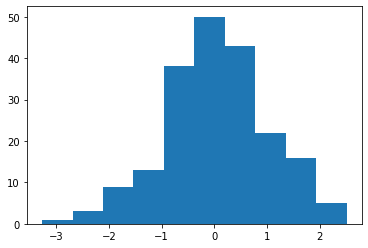

In [64]:
plt.hist(rvs1)